In [1]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [4]:
defect_dict = load_tensors_all('./defect_tensors_D10_1/SH0400/', width=128)

(53, 395, 582)
(48, 395, 582)
(11, 608, 398)
(9, 608, 398)


In [5]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 121
number of class 0: 64
	number of SN: 10
number of class 1: 57
	number of SN: 10


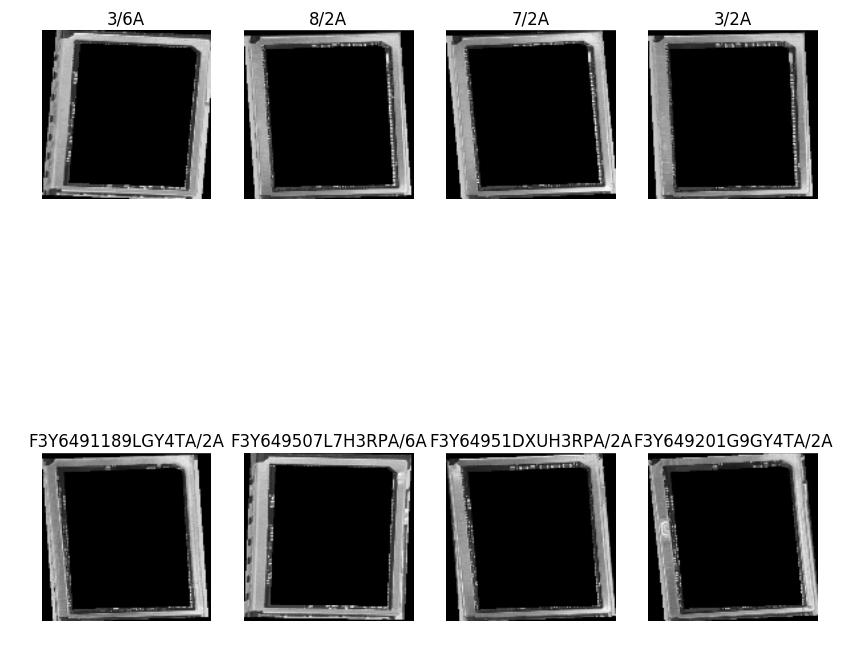

In [6]:
display_tensor(tensors, labels, sns)

In [7]:
from defectlib import GroupKFold_modeling

In [9]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=2, nb_epoch=30, input_shape=(128, 128))

Model 1
the label of validation image: 0
the s/n of validation image: 0
Train on 113 samples, validate on 8 samples
Epoch 1/30
113/113 [==============================] - 3s - loss: 0.7477 - acc: 0.5044 - val_loss: 0.7188 - val_acc: 0.0000e+00
Epoch 2/30
113/113 [==============================] - 2s - loss: 0.6982 - acc: 0.4779 - val_loss: 0.6809 - val_acc: 1.0000
Epoch 3/30
113/113 [==============================] - 2s - loss: 0.6852 - acc: 0.5929 - val_loss: 0.6585 - val_acc: 1.0000
Epoch 4/30
113/113 [==============================] - 2s - loss: 0.6421 - acc: 0.8053 - val_loss: 1.4149 - val_acc: 0.0000e+00
Epoch 5/30
113/113 [==============================] - 2s - loss: 0.6894 - acc: 0.6814 - val_loss: 0.3600 - val_acc: 1.0000
Epoch 6/30
113/113 [==============================] - 2s - loss: 0.6031 - acc: 0.6991 - val_loss: 0.4591 - val_acc: 1.0000
Epoch 7/30
113/113 [==============================] - 2s - loss: 0.5484 - acc: 0.7611 - val_loss: 0.9177 - val_acc: 0.0000e+00
Epoch 8/30


In [11]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, '0', 1.0, 1.0),
 (0, '4', 1.0, 1.0),
 (0, '1', 0.0, 0.0),
 (0, '5', 1.0, 1.0),
 (0, '6', 1.0, 1.0),
 (0, '7', 0.83333333333333337, 0.8333333333333334),
 (0, '8', 1.0, 1.0),
 (0, '3', 1.0, 1.0),
 (0, '2', 1.0, 1.0),
 (0, '9', 1.0, 1.0),
 (1, 'F3Y649405MTH3RNA', 0.8571428571428571, 0.14285714285714285),
 (1, 'F3Y649507L7H3RPA', 1.0, 0.0),
 (1, 'F3Y64951DXUH3RPA', 1.0, 0.0),
 (1, 'F3Y648605H2H3RNA', 1.0, 0.0),
 (1, 'F3Y649201G9GY4TA', 1.0, 0.0),
 (1, 'F3Y64930RLAGY4TA', 0.83333333333333337, 0.16666666666666666),
 (1, 'F3Y6491189LGY4TA', 1.0, 0.0),
 (1, 'F3Y64930FLRH3RNA', 1.0, 0.0),
 (1, 'F3Y64940AZZH3RNA', 0.80000000000000004, 0.2),
 (1, 'F3Y64940CMUH3RNA', 1.0, 0.0)]